# Stats Day Three

In [49]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import sklearn
from pprint import pprint
%matplotlib inline

TITANIC_TRAIN = 'train.csv'
TITANIC_TEST = 'test.csv'

titanic_dataframe = pd.read_csv(TITANIC_TRAIN)
titanic_dataframe.drop(["Pclass", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
titanic_dataframe.dropna(inplace=True)
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
Fare           714 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


### Did survivors pay more for their tickets than those that didn’t? If so, to what signifance level?

Categorizing ticket fares of survived and dead

In [50]:
survived_ticket_fares = titanic_dataframe[titanic_dataframe.Survived == 1].Fare
dead_ticket_fares = titanic_dataframe[titanic_dataframe.Survived == 0].Fare

Implementing graph to visualize our data.

Defining our histograms.

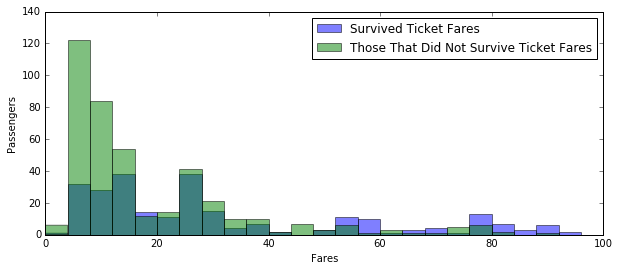

In [51]:
plt.figure(figsize=(10, 4))
opacity = 0.5
plt.hist(
        survived_ticket_fares, 
        bins=np.arange(0, 100, 4), 
        alpha=opacity,   
        label='Survived Ticket Fares'
        )
plt.hist(
        dead_ticket_fares, 
        bins=np.arange(0, 100, 4), 
        alpha=opacity,   
        label='Those That Did Not Survive Ticket Fares'
        )

plt.legend()
plt.xlabel('Fares')
plt.ylabel('Passengers')
plt.show()

As you can see from our graph, it appears that the people who paid less for their tickets had a lower survival rate than those who paid more.

**Our hypothesis is that the higher the ticket fare, the higher the chances of survival.**

Our null hypothesis ( H<sub>0</sub> ) is that ticket fare has no affect on survival rate.

Now we can run our Mann Whitney U-Test to observe if there is a statistically significant difference in survival rates based on fare.


In [52]:
data_a = survived_ticket_fares
data_b = dead_ticket_fares

# first u_stat calculation -- data_a first
u1_stat, p1_value = mannwhitneyu(data_a, data_b)
print('This is the U1 statistic: {0: 6f}'.format(u1_stat))
print('This is the P1 value: {0: g}\n'.format(p1_value))

# reverse order -- data_b first
u2_stat, p2_value = mannwhitneyu(data_b, data_a)
print('This is the U2 statistic: {0: 6f}'.format(u2_stat))
print('This is the P2 value: {0: g}'.format(p2_value))


This is the U1 statistic:  85977.500000
This is the P1 value:  1.39674e-19

This is the U2 statistic:  36982.500000
This is the P2 value:  1.39674e-19


Calculate if `data_a` is bigger or if `data_b` is bigger.

if `u1_stat > u2_stat` then `data_a` is bigger.

Otherwise `data_b` is bigger.

In [53]:
u_stat_difference = u1_stat - u2_stat
print("This is the difference in our U statistic: {}".format(u_stat_difference))

This is the difference in our U statistic: 48995.0


Given that `u1_stat` is bigger than `u2_stat`, we can assert that the distribution of `data_a` is larger.

We can reject the null hypothesis because the difference is statistically significant.

In [54]:
print("This is the P value: {}".format(p1_value))

This is the P value: 1.3967376679069213e-19


## The Basic Linear Model for the Relationship Between Age and Fare

Fare = C<sub>0</sub> \* Age

### Find a value for C<sub>0</sub> that best fits the data and illustrates the relationship between Age and Fare.

We are plotting our data on a Cartesian Graph so that we can visualize the relationship between age and fare.

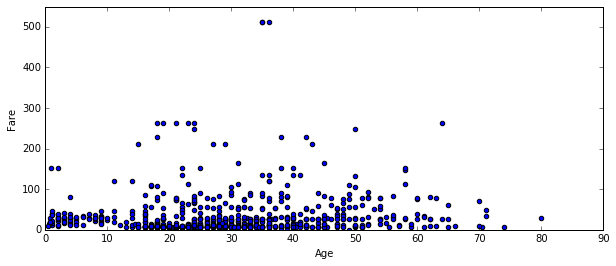

In [55]:
ages = np.array(titanic_dataframe.Age)
fares = np.array(titanic_dataframe.Fare)

# help(plt.scatter)

plt.figure(figsize=(10, 4))
plt.xlim(0, 90)
plt.ylim(0, 550)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(ages, fares)
plt.show()



Scatter plot showing age vs fare for all passengers.

Find the line of best fit.

In [ ]:
m, b = np.polyfit(ages, fares, 1)
age_range = [5, 85]
predicted = [m*age + b for age in age_range]


Plot scatterplot and our line of best fit on the same graph in order to see how model represents data as a whole.

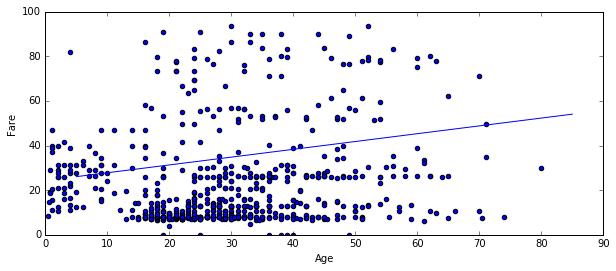

In [56]:

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
plt.xlim(0, 90)
plt.ylim(0, 100)
plt.xlabel("Age")
plt.ylabel("Fare")
ax.scatter(ages, fares)
ax.plot(age_range, predicted)
plt.show()



We now define our Chi-Squared algorithm in Python to use for our graph.

In [57]:
# function for chi-squared statistic

def chi_sq(data, model, std, dof=1):
    return sum(((data - model)/std)**2) / (len(data) - dof)

Define model from line of best fit found above.
Calculate chi-squared statistic for our dataset and model.

In [59]:
model = [m*age + b for age in ages]

chi = chi_sq(fares, model, fares.std())

print(chi)


0.992160771645


Chi is close to 1.0, this model is a good fit given our data.